###    This is an example of how to use the program phifdt_pipe.py
###    Look into phifdt_pipe.py for getting information about usage and options.

In [12]:
'''
First load the programs   
'''
import sys
sys.path.append('../../SPGPylibs/')
import SPGPylibs as spg 
from matplotlib import pyplot as plt

### There are two ways of using the pipeline right now
    1. Using json configuration (HRT like)
    2. Using just a simple call to the library
    
###     1. Using json

Json (JavaScript Object Notation) is a standard file format and data interchange format that uses text files to store dict information (attribute–value pairs). In *phifdt_pipe()* it is still limited to single PHI files (a json for each file). In any case it allows more compact programing and helps to keep track on the data reduction.

There is a program that generates a "blank" json for FDT as an starting point.

~~~
import SPGPylibs as spg 
spg.json_generator()
~~~

This will generate a file FDT.json and HRT.json (this one not in use) with the following content:
~~~
{
        "__comment1__":"data and calibration data goes here",
        "data_f" : "solo_L1_phi-hrt-ilam_20201117T170209_V202108301639C_0051170001.fits",
        "flat_f" : "/data/slam/home/sinjan/fits_files/april_avgd_2020_flat.fits",
        "dark_f" : "../fits_files/solo_L0_phi-fdt-ilam_20200228T155100_V202002281636_0022210004_000.fits",
        'input_data_dir' : './',  
        'verbose' : False,
        "__comment2__":"Data reduction options go here",
        'dark_c' : True,
        'flat_c' : True,
        'instrument' : 'FDT40',
        'hough_params' : None,
        'center_method' : 'circlefit',
        'shrink_mask' : 2,
        'norm_f' : False, 
        'flat_scaling' : 1,
        'flat_index' : False,
        'prefilter': False,
        'prefilter_fits' : '0000990710_noMeta.fits',
        'rte' : False, 
        'correct_fringes' : 'manual',
        'correct_ghost' : False,
        'putmediantozero' : True,
        'ItoQUV' : False,
        'VtoQU' : False,
        'realign' : False,
        'ind_wave' : False,
        'nlevel' : 0.3,
        'debug' : False,
        'loopthis' : 0,
        "__comment3__":"Output options go here",
        'output_dir' : './',  
}
~~~

For the definition of the different options check the `phifdt_pipe.py` file.

Lets see how this works in practice.

In [13]:
#executing
spg.json_generator()

`json_generator()` creates two files FDT.json and HRT.json as an example for json input.
We discard HRT for the moment. Within FDT.json one can find several configurable parameters (dict), whose meaning can be found in the header of `phifdt_pipe.py`. 

Lets try to make the data reduction of a single dataset (from raw data to Stokes).

So, in the json we set:

~~~
    "flat_f": "cal_files/flats_kll_23April2021_June24_spg5.fits"
    "dark_f": "cal_files/solo_L0_phi-hrt-ilam_20210428T130238_V202106300924C_0164281001_dark.fits"
    "prefilter_fits": "cal_files/0000990710_noMeta.fits"
~~~

And then we set the data file and the directory of the data separatelly.

~~~
    "data_f": "solo_L1_phi-fdt-ilam_20210914T010802_V202110211712C_0149140601.fits"
    "input_data_dir": "./data/",
~~~

Next is to set the basic data reduction parameters. We keep it simple and do not correct fringes, ghost images or prefilter, for the moment. We allow for cross-talk from I to QUV only and We set RTE to none to get just Stokes data. Do not forget to set (and create) an output directory `"output_dir"`. Default is the folder where the probram is run. Notice that ghost correction is experimental so this option will output many stuff and images.

~~~
    "instrument": "FDT40",
    "dark_c": true,
    "flat_c": true,
    "prefilter": false,
    "rte": false,
    "correct_fringes": false, # false or "manual"
    "correct_ghost": false,
    "output_dir": "./red/"
    "verbose": false,   #No verbosity. If true it will show images during the process
    "ItoQUV": true,

~~~

After this, just run the pipeline as `spg.phifdt_pipe(json_input='FDT.json')`

In [14]:
out = spg.phifdt_pipe(json_input='FDT_test.json')  #FDT_test.json contains the avobe options already. For the moment, FDT.json will be overwritten when generated

-------------------------------------------------------------- 
PHI FDT data reduction software (for develping purposes only)  
  version: V1.0 3th November 2021 
  version_cmilos: CMILOS v0.91 (July - 2021) 
-------------------------------------------------------------- 
-------------------------------------------------------------- 
 Reading config json file FDT_test.json 
{'ItoQUV': True,
 'VtoQU': False,
 'center_method': 'circlefit',
 'correct_fringes': 'manual',
 'correct_ghost': False,
 'dark_c': True,
 'dark_f': 'cal_files/solo_L0_phi-hrt-ilam_20210428T130238_V202106300924C_0164281001_dark.fits',
 'data_f': 'solo_L1_phi-fdt-ilam_20210914T010802_V202110211712C_0149140601.fits',
 'debug': False,
 'flat_c': True,
 'flat_f': 'cal_files/flats_kll_23April2021_June24_spg5.fits',
 'flat_index': False,
 'flat_scaling': 1,
 'hough_params': None,
 'ind_wave': False,
 'input_data_dir': './data/',
 'instrument': 'FDT40',
 'loopthis': 0,
 'nlevel': 0.3,
 'norm_f': False,
 'output_dir': './re

Now one cna check the output files

In [15]:
data_dir = './red/level2/'
list_of_files = spg.list_fits(path = data_dir,contain='stokes',remove_dir=True)
stokes,header = spg.fits_get(data_dir+list_of_files[0])

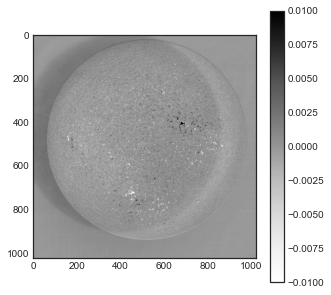

In [16]:
plt.imshow(stokes[2,3,:,:],vmin=-0.01,vmax=0.01)
plt.colorbar()
plt.show()

You should see Stokes V data with noticeable ghost image.

Adding more steps into the processing is just modifiyng the input parameters.

### Runing the RTE alone

The pipeline is sequential, meaning that the user cannot run individual steps except for the RTE (and with a bit of work).

This will be updated soon (PHI data as class objects) but it is under testing.

There is no tool for visualization so cheking the reduction steps is complicated.

So, for running the RTE alone, the user needs to use `generate_level2()` such as
~~~~
    rte = 'RTE'
    rte_invs = generate_level2(stokes,wave_axis,rte)
~~~~

The wave axis has to be provided. To extract the waveaxis from the data one can run:

~~~~
    wave_axis,voltagesData,tunning_constant,cpos,ref_wavelength = fits_get_sampling(data_filename)  
~~~~

However, the continuum in the stokes reduced data is always put in the BLUE but the header is not mdified so far.
This is something that has to be updated soon. So far, it is the only output of `phifdt_pipe()`

The results are NOT stored in the `red` folder in this case. 

In [17]:
rte = 'RTE'
rte_invs = spg.generate_level2(stokes,out,rte)#,milos_executable = 'python')

milos.dss67
Cmilos executable located at: /Users/orozco/Dropbox (IdAdA)/Python/VS-GitHub/SPGPylibs/SPGPylibs/PHItools/cmilos/
   It is assumed the wavelength is given by the header info 
         wave axis:  [6173.0382002 6173.1976904 6173.2672478 6173.3354    6173.4049574
 6173.4741635]
         wave axis (step):   [-297.1998 -137.7096  -68.1522    0.       69.5574  138.7635]
   saving data into dummy_in.txt for RTE input
6 4 1024 1024
  ---- >>>>> Inverting data.... 
0
  ---- >>>>> Finishing.... 
  ---- >>>>> Reading results.... 
0
0
1048576.0
1024.0
'phi_rte'  232.91 seconds


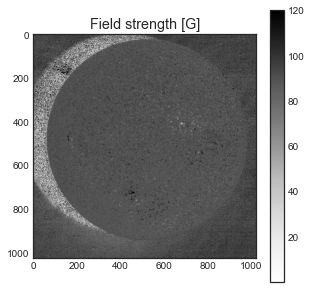

In [18]:
#check results
plt.imshow(rte_invs[3,:,:],vmax=120)
plt.title('Field strength [G]')
plt.colorbar()
plt.show()

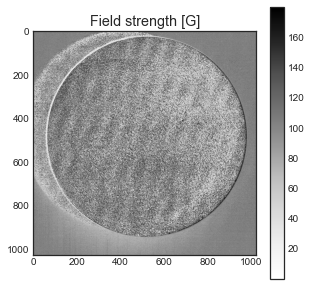

In [19]:
plt.imshow(rte_invs[4,:,:])
plt.title('Field strength [G]')
plt.colorbar()

    
###     2. Calling the library

In this case, there is no need to use a json file. Many files can be processsed in a row.

In [20]:
input_data_dir = './data/'
list_of_files = sorted(spg.list_fits(path = input_data_dir,contain='L1',remove_dir=True))
for i in list_of_files:
  print(i)

solo_L1_phi-fdt-ilam_20210914T010802_V202110211712C_0149140601.fits
solo_L1_phi-fdt-ilam_20210914T011121_V202110180530C_0149140602.fits
solo_L1_phi-fdt-ilam_20210914T011433_V202110180530C_0149140603.fits
solo_L1_phi-fdt-ilam_20210914T011745_V202110180530C_0149140604.fits


In [21]:
dark_f = 'cal_files/solo_L0_phi-hrt-ilam_20210428T130238_V202106300924C_0164281001_dark.fits'
flat_f = 'cal_files/flats_kll_23April2021_June24_spg5.fits'
prefilter = 'cal_files/0000990710_noMeta.fits'

In [22]:
for i in list_of_files:
    spg.phifdt_pipe(data_f=i,input_data_dir = input_data_dir, dark_f = dark_f,flat_f = flat_f,prefilter=False,instrument = 'FDT40', prefilter_fits = prefilter,shrink_mask = 1,correct_ghost=False, verbose = False,
               correct_fringes='manual',ItoQUV=True,center_method = None,output_dir = 'red/',rte = 'RTE')


-------------------------------------------------------------- 
PHI FDT data reduction software (for develping purposes only)  
  version: V1.0 3th November 2021 
  version_cmilos: CMILOS v0.91 (July - 2021) 
-------------------------------------------------------------- 
File exist
-->>>>>>> Reading Data file: ./data/solo_L1_phi-fdt-ilam_20210914T010802_V202110211712C_0149140601.fits
-->>>>>>> data DID 149140601
          DATA IS DIVIDED by 256.   
-->>>>>>> Reshaping data to [wave,Stokes,y-dim,x-dim] 
Dimensions:  512 1535 512 1535
         data cropped to: [ 512 , 1535 ],[ 512 , 1535 ]
-->>>>>>> Reading flat filecal_files/flats_kll_23April2021_June24_spg5.fits
          Assumes they are already normalized to ONE 
          input should be [wave X Stokes,y-dim,x-dim].
-->>>>>>> Reshaping Flat to [wave,Stokes,y-dim,x-dim] 
-->>>>>>> Reading Darks                   
          Input should be [y-dim,x-dim].
          DARK IS DIVIDED by 256.   
Dark DID:  164281001
          checking sca